In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/gdrive/My Drive/data/creditcard.csv")
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head(4).T

,0,1,2,3
Time,0.000000,0.000000,1.000000,1.000000
V1,-1.359807,1.191857,-1.358354,-0.966272
V2,-0.072781,0.266151,-1.340163,-0.185226
V3,2.536347,0.166480,1.773209,1.792993
V4,1.378155,0.448154,0.379780,-0.863291
V5,-0.338321,0.060018,-0.503198,-0.010309
V6,0.462388,-0.082361,1.800499,1.247203
V7,0.239599,-0.078803,0.791461,0.237609
V8,0.098698,0.085102,0.247676,0.377436
V9,0.363787,-0.255425,-1.514654,-1.387024


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
label_name = "Class"

In [ ]:
X = df.drop(columns= label_name)
y = df[label_name]
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42, stratify= y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [ ]:
y_train.value_counts(1)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
import tensorflow as tf

In [ ]:
dir(tf.keras.activations)[10:]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

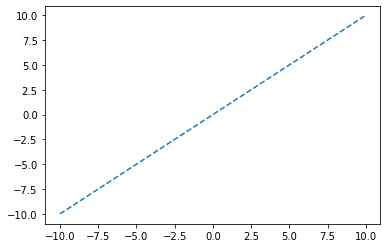

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, x, linestyle= '--', label ="x")

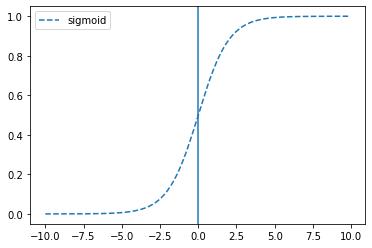

In [ ]:
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle= '--', label = "sigmoid")
plt.axvline(0)
plt.legend()

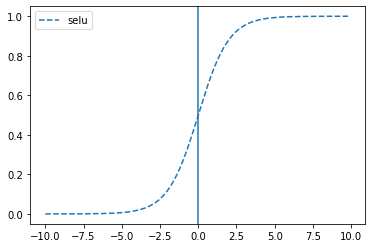

In [ ]:
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle='--', label="selu") 
plt.axvline(0)
plt.legend()

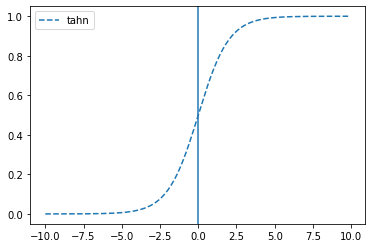

In [ ]:
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle='--', label="tahn") 
plt.axvline(0)
plt.legend()

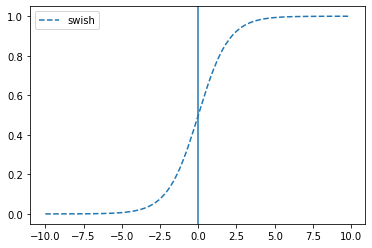

In [ ]:
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle='--', label="swish") 
plt.axvline(0)
plt.legend()

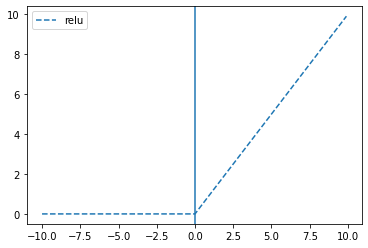

In [ ]:
plt.plot(x, tf.keras.activations.relu(x), linestyle = '--', label ="relu")
plt.axvline(0)
plt.legend()

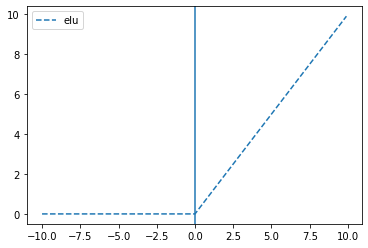

In [ ]:
plt.plot(x, tf.keras.activations.relu(x), linestyle = '--', label ="elu")
plt.axvline(0)
plt.legend()

In [ ]:
input_shape = X.shape[1]
input_shape

30

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 128, input_shape=[input_shape]),
  tf.keras.layers.Dense(256, activation='selu'),
  tf.keras.layers.Dense(128, activation='selu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer="adam",
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 70,017
Trainable params: 70,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end = '')
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 20)

In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,
                    callbacks = [early_stop, PrintDot()], verbose = 0)


...........................................................

In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
54,0.013076,0.998294,0.013313,0.998179
55,0.013120,0.998294,0.013675,0.998179
56,0.013069,0.998294,0.013316,0.998179
57,0.013175,0.998294,0.013362,0.998179
58,0.013018,0.998294,0.013338,0.998179


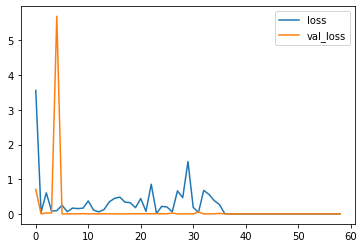

In [ ]:
df_hist[["loss","val_loss"]].plot()

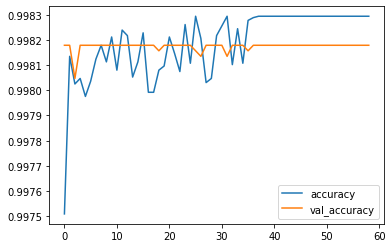

In [ ]:
df_hist[["accuracy","val_accuracy"]].plot()

In [ ]:
y_predint = (y_pred.flatten() > 0.5).astype(int)
y_predint

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0127 - accuracy: 0.9983


(0.012682750821113586, 0.9982795715332031)

In [ ]:
(y_test == y_predint).mean()

0.9991397773954567

In [ ]:
(y_test == y_pred).mean()

0.9991397773954567

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predint)

0.7487179487179487

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predint))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

